https://dacon.io/competitions/official/236109/codeshare/8419?page=1&dtype=recent

#### 데이터 확인, 전처리

In [ ]:
!pip install optuna
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from sklearn.metrics import f1_score

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
print(train.info())
print(train.isnull().sum())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [ ]:
print(test.info())
print(test.isnull().sum())
print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       17289 non-null  object 
 1   월        17289 non-null  int64  
 2   요일       17289 non-null  object 
 3   시간       17289 non-null  int64  
 4   소관경찰서    17289 non-null  int64  
 5   소관지역     17289 non-null  float64
 6   사건발생거리   17289 non-null  float64
 7   강수량(mm)  17289 non-null  float64
 8   강설량(mm)  17289 non-null  float64
 9   적설량(cm)  17289 non-null  float64
 10  풍향       17289 non-null  float64
 11  안개       17289 non-null  float64
 12  짙은안개     17289 non-null  float64
 13  번개       17289 non-null  float64
 14  진눈깨비     17289 non-null  float64
 15  서리       17289 non-null  float64
 16  연기/연무    17289 non-null  float64
 17  눈날림      17289 non-null  float64
 18  범죄발생지    17289 non-null  object 
dtypes: float64(13), int64(3), object(3)
memory usage: 2.5+ MB
None
ID         0
월          0

자료형 변환(float >> int)

In [ ]:
cols = ['소관지역', '사건발생거리', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림']

train[cols] = train[cols].astype('int64')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  int64  
 6   사건발생거리   84406 non-null  int64  
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  int64  
 11  안개       84406 non-null  int64  
 12  짙은안개     84406 non-null  int64  
 13  번개       84406 non-null  int64  
 14  진눈깨비     84406 non-null  int64  
 15  서리       84406 non-null  int64  
 16  연기/연무    84406 non-null  int64  
 17  눈날림      84406 non-null  int64  
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(3), int64(14), object(3)
memory usage: 

타겟값이 불균형한 분포를 보임

In [ ]:
train['TARGET'].value_counts()

0    36453
1    25397
2    22556
Name: TARGET, dtype: int64

ID칼럼 드랍

In [ ]:
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

In [ ]:
print(train.head(3))
print(test.head(3))

    월   요일  시간  소관경찰서  소관지역  사건발생거리  강수량(mm)  강설량(mm)  적설량(cm)   풍향  안개  짙은안개  \
0   9  화요일  10    137     8       2      0.0      0.0      0.0  245   0     0   
1  11  화요일   6    438    13       3      0.0      0.0      0.0  200   0     0   
2   8  일요일   6   1729    47       1      0.0      0.0      0.0   40   1     0   

   번개  진눈깨비  서리  연기/연무  눈날림 범죄발생지  TARGET  
0   0     0   0      0    0    차도       2  
1   0     0   0      0    0    차도       0  
2   0     0   0      1    0    인도       1  
   월   요일  시간  소관경찰서  소관지역    사건발생거리    강수량(mm)  강설량(mm)  적설량(cm)     풍향   안개  \
0  9  금요일   5    927  28.0  1.570654  19.625000      0.0      0.0  165.0  1.0   
1  5  수요일   3    926  28.0  1.712457  21.444444      0.0      0.0  175.0  1.0   
2  5  월요일   6   1437  33.0  0.447496  25.200000      0.0      0.0  290.0  1.0   

   짙은안개   번개  진눈깨비   서리  연기/연무  눈날림 범죄발생지  
0   0.0  1.0   0.0  0.0    0.0  0.0    차도  
1   0.0  0.0   0.0  0.0    1.0  0.0    식당  
2   0.0  0.0   0.0  0.0    0.0  0.0   주거지 

TARGET 분리

In [ ]:
y_train = train['TARGET']
X_train = train.drop(columns='TARGET')

요일, 범죄발생지 라벨인코딩

In [ ]:
cols = ["요일", "범죄발생지"]

for i in range(len(cols)):
  print("\n--- 종류: ", X_train[cols[i]].unique().size)
  print(X_train[cols[i]].value_counts())


--- 종류:  7
5    13317
4    12837
0    12243
3    11702
6    11566
2    11410
1    11331
Name: 요일, dtype: int64

--- 종류:  14
7     36077
10    25879
6      6437
11     4835
9      3262
3      1806
1      1493
8      1324
0       736
12      728
4       653
13      591
2       453
5       132
Name: 범죄발생지, dtype: int64


In [ ]:
encoder = LabelEncoder()

for i in range(len(cols)):
  X_train[cols[i]] = encoder.fit_transform(X_train[cols[i]])
  test[cols[i]] = encoder.transform(test[cols[i]])

In [ ]:
# 변환 결과 확인 

for i in range(len(cols)):
  print("\n--- 종류: ", X_train[cols[i]].unique().size)
  print(X_train[cols[i]].value_counts())


--- 종류:  7
5    13317
4    12837
0    12243
3    11702
6    11566
2    11410
1    11331
Name: 요일, dtype: int64

--- 종류:  14
7     36077
10    25879
6      6437
11     4835
9      3262
3      1806
1      1493
8      1324
0       736
12      728
4       653
13      591
2       453
5       132
Name: 범죄발생지, dtype: int64


데이터 분리(이미 분리되어 있는 학습, 테스트용 말고 학습용, 검증용 데이터 분리)

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

print(x_tr.shape, y_tr.shape)
print(x_val.shape, y_val.shape)

(67524, 18) (67524,)
(16882, 18) (16882,)


train, val 데이터셋의 타겟별 분포 비율 확인 >> 불균형

In [ ]:
print(y_tr.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.431876
1    0.300886
2    0.267238
Name: TARGET, dtype: float64
0    0.431880
1    0.300912
2    0.267208
Name: TARGET, dtype: float64


클래스별 가중치 계산

- Class Weight

  class weight는 전체 학습 데이터에 대해서 클래스별 가중치를 계산하는 방법으로 같은 클래스 내의 데이터 샘플은 같은 weight값을 갖는다.

  class i에 해당하는 class weight는 >> n_samples / (n_classes * np.bincount(y)) << 으로 계산.
  
  sklearn에서 제공하는 compute_class_weight로 계산, 활용 가능

  total num samples와 n_classes는 weight를 normalizing하는 항으로 class별 샘플의 역수가 weight를 결정함


* compute_class_weight

! 참고 사이트

https://hyeonchan523.tistory.com/3

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

https://optilog.tistory.com/55

* np.bincount(): 1차원 배열과 양의 정수형인 객체에 적용합니다.
객체의 원소중 0부터 최대값 범위의 정수값을 올림차순으로 정리한 뒤 각 원소에 대한 빈도수를 반환합니다.

In [ ]:
weight = dict()

n_classes = 3
cnt = np.bincount(y_tr)
n_samples = cnt.sum()

for i in range(n_classes):
  weight[i] = n_samples / (n_classes * cnt[i])

print(weight)

{0: 0.7718263493587545, 1: 1.1078407245164148, 2: 1.2473261291216404}


In [ ]:
#이 코드로도 가중치 계산 가능
from sklearn.utils import class_weight

weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                            classes = np.unique(y_tr),
                                            y = y_tr)
print(weights)

[0.77182635 1.10784072 1.24732613]


범주형 변수의 인덱스 저장

In [ ]:
cat_cols = np.where(x_tr.dtypes != np.float)[0]
cat_cols

<ipython-input-80-21eca591d878>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = np.where(x_tr.dtypes != np.float)[0]


array([ 0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 13, 14, 15, 16, 17])

#### 모델 학습 + optuna

- CatBoost: https://hanishrohit.medium.com/whats-so-special-about-catboost-335d64d754ae



In [ ]:
def objectiveCAT(trial: Trial, x_tr, y_tr, x_val, y_val, weight):
    param = {
        'iterations' : trial.suggest_int('iterations', 100, 1000),
        'depth' : trial.suggest_int('depth', 3, 8),
        'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.1),
        'random_state' : 0,
        'class_weights': weight, 
        'cat_features' : cat_cols
    }
    
    # 학습 모델 생성
    model = CatBoostClassifier(**param)
    cat_model = model.fit(x_tr, y_tr, verbose=True)
    
    # 모델 성능 확인
    pred = cat_model.predict(x_val)
    score = f1_score(y_val, pred, average="micro")
    
    return score

하이퍼 파라미터 튜닝

- optuna;

  https://optuna.org/

  https://dacon.io/codeshare/2704

  https://velog.io/@ttogle918/optuna-%EC%82%AC%EC%9A%A9%EB%B2%95

  https://ssoonidev.tistory.com/107

In [82]:
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=0))
study.optimize(lambda trial : objectiveCAT(trial, x_tr, y_tr, x_val, y_val, weight), n_trials = 30)

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-06 05:28:35,048] A new study created in memory with name: no-name-e3af4b87-2e41-4b1e-a176-e41101ebeadc


0:	learn: 1.0871281	total: 450ms	remaining: 4m 26s
1:	learn: 1.0764893	total: 779ms	remaining: 3m 50s
2:	learn: 1.0673384	total: 1.14s	remaining: 3m 44s
3:	learn: 1.0597494	total: 1.35s	remaining: 3m 19s
4:	learn: 1.0527695	total: 1.62s	remaining: 3m 10s
5:	learn: 1.0462919	total: 2.1s	remaining: 3m 25s
6:	learn: 1.0403638	total: 2.43s	remaining: 3m 23s
7:	learn: 1.0350605	total: 2.84s	remaining: 3m 28s
8:	learn: 1.0300266	total: 3.19s	remaining: 3m 27s
9:	learn: 1.0257520	total: 3.62s	remaining: 3m 31s
10:	learn: 1.0223271	total: 3.97s	remaining: 3m 30s
11:	learn: 1.0184909	total: 4.35s	remaining: 3m 30s
12:	learn: 1.0154398	total: 4.75s	remaining: 3m 32s
13:	learn: 1.0126561	total: 5.1s	remaining: 3m 31s
14:	learn: 1.0099308	total: 5.46s	remaining: 3m 30s
15:	learn: 1.0075701	total: 6.16s	remaining: 3m 42s
16:	learn: 1.0054235	total: 6.91s	remaining: 3m 54s
17:	learn: 1.0035291	total: 7.58s	remaining: 4m 2s
18:	learn: 1.0016168	total: 8.34s	remaining: 4m 12s
19:	learn: 0.9998384	tota

[I 2023-06-06 05:33:44,269] Trial 0 finished with value: 0.5496386684042175 and parameters: {'iterations': 594, 'depth': 7, 'learning_rate': 0.06067357423109275}. Best is trial 0 with value: 0.5496386684042175.


0:	learn: 1.0869128	total: 287ms	remaining: 2m 49s
1:	learn: 1.0763213	total: 527ms	remaining: 2m 34s
2:	learn: 1.0667373	total: 715ms	remaining: 2m 19s
3:	learn: 1.0585767	total: 998ms	remaining: 2m 26s
4:	learn: 1.0510419	total: 1.24s	remaining: 2m 24s
5:	learn: 1.0445062	total: 1.51s	remaining: 2m 26s
6:	learn: 1.0386973	total: 1.74s	remaining: 2m 24s
7:	learn: 1.0335422	total: 1.96s	remaining: 2m 22s
8:	learn: 1.0290355	total: 2.18s	remaining: 2m 21s
9:	learn: 1.0248406	total: 2.42s	remaining: 2m 20s
10:	learn: 1.0211399	total: 2.67s	remaining: 2m 20s
11:	learn: 1.0179034	total: 2.91s	remaining: 2m 20s
12:	learn: 1.0151079	total: 3.14s	remaining: 2m 19s
13:	learn: 1.0123568	total: 3.46s	remaining: 2m 22s
14:	learn: 1.0099907	total: 3.88s	remaining: 2m 28s
15:	learn: 1.0077996	total: 4.36s	remaining: 2m 36s
16:	learn: 1.0059085	total: 4.82s	remaining: 2m 42s
17:	learn: 1.0042240	total: 5.27s	remaining: 2m 47s
18:	learn: 1.0027139	total: 5.7s	remaining: 2m 51s
19:	learn: 1.0012334	to

[I 2023-06-06 05:36:54,797] Trial 1 finished with value: 0.5515341784148797 and parameters: {'iterations': 590, 'depth': 5, 'learning_rate': 0.06494351719359896}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0801085	total: 1.13s	remaining: 9m 19s
1:	learn: 1.0651636	total: 1.83s	remaining: 7m 31s
2:	learn: 1.0529068	total: 2.61s	remaining: 7m 7s
3:	learn: 1.0417448	total: 3.16s	remaining: 6m 27s
4:	learn: 1.0325829	total: 3.85s	remaining: 6m 16s
5:	learn: 1.0247537	total: 4.5s	remaining: 6m 6s
6:	learn: 1.0184927	total: 5.1s	remaining: 5m 54s
7:	learn: 1.0131069	total: 5.75s	remaining: 5m 49s
8:	learn: 1.0086118	total: 6.35s	remaining: 5m 42s
9:	learn: 1.0045831	total: 6.92s	remaining: 5m 34s
10:	learn: 1.0012104	total: 7.53s	remaining: 5m 30s
11:	learn: 0.9979709	total: 8.2s	remaining: 5m 29s
12:	learn: 0.9950996	total: 8.89s	remaining: 5m 28s
13:	learn: 0.9925329	total: 9.49s	remaining: 5m 25s
14:	learn: 0.9903609	total: 10s	remaining: 5m 20s
15:	learn: 0.9880939	total: 10.7s	remaining: 5m 19s
16:	learn: 0.9862036	total: 11.5s	remaining: 5m 23s
17:	learn: 0.9848512	total: 12.7s	remaining: 5m 36s
18:	learn: 0.9833101	total: 14s	remaining: 5m 49s
19:	learn: 0.9819390	total: 14.

[I 2023-06-06 05:43:51,937] Trial 2 finished with value: 0.5478616277692216 and parameters: {'iterations': 494, 'depth': 8, 'learning_rate': 0.09640261328960191}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0884740	total: 377ms	remaining: 2m 47s
1:	learn: 1.0789268	total: 697ms	remaining: 2m 34s
2:	learn: 1.0705977	total: 1.04s	remaining: 2m 33s
3:	learn: 1.0635774	total: 1.24s	remaining: 2m 16s
4:	learn: 1.0570374	total: 1.52s	remaining: 2m 13s
5:	learn: 1.0508993	total: 1.98s	remaining: 2m 24s
6:	learn: 1.0452254	total: 2.3s	remaining: 2m 23s
7:	learn: 1.0400358	total: 2.63s	remaining: 2m 23s
8:	learn: 1.0354279	total: 3.01s	remaining: 2m 25s
9:	learn: 1.0312479	total: 3.28s	remaining: 2m 22s
10:	learn: 1.0275934	total: 3.63s	remaining: 2m 23s
11:	learn: 1.0241922	total: 3.98s	remaining: 2m 23s
12:	learn: 1.0209710	total: 4.39s	remaining: 2m 25s
13:	learn: 1.0180453	total: 4.79s	remaining: 2m 27s
14:	learn: 1.0152280	total: 5.48s	remaining: 2m 37s
15:	learn: 1.0124934	total: 6.18s	remaining: 2m 45s
16:	learn: 1.0100131	total: 6.86s	remaining: 2m 52s
17:	learn: 1.0076983	total: 7.22s	remaining: 2m 51s
18:	learn: 1.0058026	total: 7.63s	remaining: 2m 51s
19:	learn: 1.0039349	to

[I 2023-06-06 05:47:32,690] Trial 3 finished with value: 0.5509418315365479 and parameters: {'iterations': 445, 'depth': 7, 'learning_rate': 0.05336059705553755}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0969991	total: 643ms	remaining: 6m 31s
1:	learn: 1.0953918	total: 1.24s	remaining: 6m 18s
2:	learn: 1.0937889	total: 1.76s	remaining: 5m 56s
3:	learn: 1.0922004	total: 2.34s	remaining: 5m 55s
4:	learn: 1.0906723	total: 2.95s	remaining: 5m 57s
5:	learn: 1.0891571	total: 3.54s	remaining: 5m 56s
6:	learn: 1.0876782	total: 4.09s	remaining: 5m 53s
7:	learn: 1.0862363	total: 4.72s	remaining: 5m 55s
8:	learn: 1.0848465	total: 5.26s	remaining: 5m 51s
9:	learn: 1.0834028	total: 5.96s	remaining: 5m 58s
10:	learn: 1.0820025	total: 7.09s	remaining: 6m 26s
11:	learn: 1.0806232	total: 7.97s	remaining: 6m 37s
12:	learn: 1.0793103	total: 8.52s	remaining: 6m 32s
13:	learn: 1.0779695	total: 9.04s	remaining: 6m 25s
14:	learn: 1.0766611	total: 9.57s	remaining: 6m 20s
15:	learn: 1.0753702	total: 10.2s	remaining: 6m 20s
16:	learn: 1.0741075	total: 10.9s	remaining: 6m 19s
17:	learn: 1.0728316	total: 11.4s	remaining: 6m 15s
18:	learn: 1.0716056	total: 12.1s	remaining: 6m 15s
19:	learn: 1.0703420	t

[I 2023-06-06 05:55:10,761] Trial 4 finished with value: 0.5496979030920507 and parameters: {'iterations': 611, 'depth': 8, 'learning_rate': 0.008032569761590808}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0856100	total: 117ms	remaining: 20.7s
1:	learn: 1.0750557	total: 226ms	remaining: 19.8s
2:	learn: 1.0642351	total: 338ms	remaining: 19.7s
3:	learn: 1.0551573	total: 444ms	remaining: 19.3s
4:	learn: 1.0475615	total: 549ms	remaining: 19s
5:	learn: 1.0406835	total: 646ms	remaining: 18.5s
6:	learn: 1.0352348	total: 747ms	remaining: 18.2s
7:	learn: 1.0304297	total: 849ms	remaining: 18s
8:	learn: 1.0262061	total: 947ms	remaining: 17.8s
9:	learn: 1.0224283	total: 1.06s	remaining: 17.8s
10:	learn: 1.0194996	total: 1.16s	remaining: 17.6s
11:	learn: 1.0168040	total: 1.26s	remaining: 17.4s
12:	learn: 1.0142672	total: 1.37s	remaining: 17.4s
13:	learn: 1.0124944	total: 1.47s	remaining: 17.2s
14:	learn: 1.0107263	total: 1.57s	remaining: 17s
15:	learn: 1.0090782	total: 1.67s	remaining: 16.9s
16:	learn: 1.0075885	total: 1.77s	remaining: 16.8s
17:	learn: 1.0063090	total: 1.87s	remaining: 16.6s
18:	learn: 1.0051873	total: 1.97s	remaining: 16.5s
19:	learn: 1.0041607	total: 2.07s	remaining: 16

[I 2023-06-06 05:55:31,305] Trial 5 finished with value: 0.5438929036843976 and parameters: {'iterations': 178, 'depth': 3, 'learning_rate': 0.08342936470924586}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0798390	total: 632ms	remaining: 8m 25s
1:	learn: 1.0647297	total: 1.3s	remaining: 8m 39s
2:	learn: 1.0523708	total: 2.06s	remaining: 9m 8s
3:	learn: 1.0411407	total: 2.63s	remaining: 8m 43s
4:	learn: 1.0319481	total: 3.29s	remaining: 8m 43s
5:	learn: 1.0241082	total: 3.94s	remaining: 8m 41s
6:	learn: 1.0178542	total: 4.54s	remaining: 8m 34s
7:	learn: 1.0124873	total: 5.16s	remaining: 8m 31s
8:	learn: 1.0080132	total: 5.76s	remaining: 8m 27s
9:	learn: 1.0036933	total: 6.32s	remaining: 8m 19s
10:	learn: 1.0003449	total: 7.36s	remaining: 8m 48s
11:	learn: 0.9971226	total: 8.61s	remaining: 9m 25s
12:	learn: 0.9942790	total: 9.28s	remaining: 9m 22s
13:	learn: 0.9917489	total: 9.8s	remaining: 9m 11s
14:	learn: 0.9894673	total: 10.4s	remaining: 9m 5s
15:	learn: 0.9877702	total: 11.1s	remaining: 9m 4s
16:	learn: 0.9861536	total: 11.7s	remaining: 8m 58s
17:	learn: 0.9847435	total: 12.4s	remaining: 8m 58s
18:	learn: 0.9833360	total: 13s	remaining: 8m 55s
19:	learn: 0.9818891	total: 1

[I 2023-06-06 06:06:35,414] Trial 6 finished with value: 0.5438336689965644 and parameters: {'iterations': 801, 'depth': 8, 'learning_rate': 0.09788321588104364}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0846099	total: 275ms	remaining: 3m 45s
1:	learn: 1.0723320	total: 504ms	remaining: 3m 25s
2:	learn: 1.0615345	total: 692ms	remaining: 3m 8s
3:	learn: 1.0524929	total: 979ms	remaining: 3m 19s
4:	learn: 1.0443077	total: 1.22s	remaining: 3m 19s
5:	learn: 1.0373953	total: 1.49s	remaining: 3m 21s
6:	learn: 1.0313975	total: 1.72s	remaining: 3m 20s
7:	learn: 1.0261396	total: 1.95s	remaining: 3m 18s
8:	learn: 1.0217688	total: 2.23s	remaining: 3m 20s
9:	learn: 1.0174525	total: 2.5s	remaining: 3m 22s
10:	learn: 1.0139673	total: 2.76s	remaining: 3m 23s
11:	learn: 1.0110628	total: 3.01s	remaining: 3m 22s
12:	learn: 1.0080662	total: 3.26s	remaining: 3m 22s
13:	learn: 1.0055184	total: 3.52s	remaining: 3m 22s
14:	learn: 1.0030381	total: 3.77s	remaining: 3m 22s
15:	learn: 1.0011431	total: 4.03s	remaining: 3m 22s
16:	learn: 0.9993302	total: 4.27s	remaining: 3m 21s
17:	learn: 0.9979923	total: 4.51s	remaining: 3m 20s
18:	learn: 0.9966132	total: 4.74s	remaining: 3m 19s
19:	learn: 0.9952734	tot

[I 2023-06-06 06:10:55,522] Trial 7 finished with value: 0.5500533112190499 and parameters: {'iterations': 820, 'depth': 5, 'learning_rate': 0.07827238845235909}. Best is trial 1 with value: 0.5515341784148797.


0:	learn: 1.0956679	total: 331ms	remaining: 1m 7s
1:	learn: 1.0927433	total: 666ms	remaining: 1m 7s
2:	learn: 1.0897745	total: 942ms	remaining: 1m 3s
3:	learn: 1.0869781	total: 1.27s	remaining: 1m 4s
4:	learn: 1.0845820	total: 1.46s	remaining: 58.6s
5:	learn: 1.0820350	total: 1.77s	remaining: 58.9s
6:	learn: 1.0795457	total: 2.07s	remaining: 58.9s
7:	learn: 1.0771516	total: 2.38s	remaining: 58.8s
8:	learn: 1.0747597	total: 2.67s	remaining: 58.4s
9:	learn: 1.0724572	total: 2.96s	remaining: 58.1s
10:	learn: 1.0701890	total: 3.26s	remaining: 57.9s
11:	learn: 1.0680529	total: 3.51s	remaining: 56.8s
12:	learn: 1.0658829	total: 3.81s	remaining: 56.5s
13:	learn: 1.0638545	total: 4.09s	remaining: 56.1s
14:	learn: 1.0619373	total: 4.4s	remaining: 56s
15:	learn: 1.0599938	total: 4.71s	remaining: 55.9s
16:	learn: 1.0582173	total: 5.04s	remaining: 56.1s
17:	learn: 1.0563633	total: 5.63s	remaining: 58.8s
18:	learn: 1.0546135	total: 6.13s	remaining: 1m
19:	learn: 1.0529706	total: 6.65s	remaining: 1m

[I 2023-06-06 06:12:06,965] Trial 8 finished with value: 0.5478616277692216 and parameters: {'iterations': 206, 'depth': 6, 'learning_rate': 0.015191975453495595}. Best is trial 1 with value: 0.5515341784148797.


205:	learn: 0.9800020	total: 1m 10s	remaining: 0us
0:	learn: 1.0905726	total: 333ms	remaining: 5m 16s
1:	learn: 1.0830255	total: 664ms	remaining: 5m 15s
2:	learn: 1.0757852	total: 938ms	remaining: 4m 56s
3:	learn: 1.0693339	total: 1.27s	remaining: 5m 1s
4:	learn: 1.0641457	total: 1.46s	remaining: 4m 36s
5:	learn: 1.0588481	total: 1.76s	remaining: 4m 37s
6:	learn: 1.0537769	total: 2.06s	remaining: 4m 37s
7:	learn: 1.0489967	total: 2.35s	remaining: 4m 36s
8:	learn: 1.0447844	total: 2.68s	remaining: 4m 40s
9:	learn: 1.0408970	total: 2.95s	remaining: 4m 37s
10:	learn: 1.0371965	total: 3.21s	remaining: 4m 34s
11:	learn: 1.0337854	total: 3.54s	remaining: 4m 36s
12:	learn: 1.0306509	total: 3.87s	remaining: 4m 39s
13:	learn: 1.0276205	total: 4.17s	remaining: 4m 39s
14:	learn: 1.0248932	total: 4.48s	remaining: 4m 39s
15:	learn: 1.0223147	total: 4.76s	remaining: 4m 38s
16:	learn: 1.0199133	total: 5.04s	remaining: 4m 36s
17:	learn: 1.0177499	total: 5.35s	remaining: 4m 37s
18:	learn: 1.0158036	tot

[I 2023-06-06 06:18:26,572] Trial 9 finished with value: 0.5520672906053785 and parameters: {'iterations': 951, 'depth': 6, 'learning_rate': 0.04205153205906184}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0928434	total: 158ms	remaining: 2m 32s
1:	learn: 1.0873649	total: 318ms	remaining: 2m 33s
2:	learn: 1.0823697	total: 473ms	remaining: 2m 32s
3:	learn: 1.0776232	total: 629ms	remaining: 2m 31s
4:	learn: 1.0732389	total: 761ms	remaining: 2m 26s
5:	learn: 1.0692347	total: 884ms	remaining: 2m 22s
6:	learn: 1.0652834	total: 1.02s	remaining: 2m 20s
7:	learn: 1.0615991	total: 1.18s	remaining: 2m 21s
8:	learn: 1.0581107	total: 1.3s	remaining: 2m 19s
9:	learn: 1.0548683	total: 1.46s	remaining: 2m 19s
10:	learn: 1.0519934	total: 1.61s	remaining: 2m 20s
11:	learn: 1.0492016	total: 1.76s	remaining: 2m 20s
12:	learn: 1.0465088	total: 1.92s	remaining: 2m 21s
13:	learn: 1.0439518	total: 2.05s	remaining: 2m 19s
14:	learn: 1.0415471	total: 2.18s	remaining: 2m 19s
15:	learn: 1.0392379	total: 2.3s	remaining: 2m 17s
16:	learn: 1.0371056	total: 2.44s	remaining: 2m 16s
17:	learn: 1.0350713	total: 2.57s	remaining: 2m 16s
18:	learn: 1.0331642	total: 2.72s	remaining: 2m 16s
19:	learn: 1.0312188	tot

[I 2023-06-06 06:21:19,881] Trial 10 finished with value: 0.548868617462386 and parameters: {'iterations': 970, 'depth': 3, 'learning_rate': 0.03152914343167827}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0916198	total: 279ms	remaining: 4m 29s
1:	learn: 1.0849031	total: 513ms	remaining: 4m 7s
2:	learn: 1.0785162	total: 701ms	remaining: 3m 44s
3:	learn: 1.0727424	total: 997ms	remaining: 3m 59s
4:	learn: 1.0672592	total: 1.23s	remaining: 3m 55s
5:	learn: 1.0623877	total: 1.47s	remaining: 3m 54s
6:	learn: 1.0578655	total: 1.68s	remaining: 3m 50s
7:	learn: 1.0535942	total: 1.9s	remaining: 3m 47s
8:	learn: 1.0496771	total: 2.17s	remaining: 3m 50s
9:	learn: 1.0461688	total: 2.38s	remaining: 3m 47s
10:	learn: 1.0428036	total: 2.59s	remaining: 3m 44s
11:	learn: 1.0395753	total: 2.79s	remaining: 3m 41s
12:	learn: 1.0366255	total: 3s	remaining: 3m 39s
13:	learn: 1.0339024	total: 3.26s	remaining: 3m 41s
14:	learn: 1.0313935	total: 3.5s	remaining: 3m 41s
15:	learn: 1.0290651	total: 3.69s	remaining: 3m 38s
16:	learn: 1.0267076	total: 3.94s	remaining: 3m 39s
17:	learn: 1.0243779	total: 4.21s	remaining: 3m 41s
18:	learn: 1.0222585	total: 4.5s	remaining: 3m 44s
19:	learn: 1.0202865	total: 4

[I 2023-06-06 06:26:30,531] Trial 11 finished with value: 0.5503494846582159 and parameters: {'iterations': 965, 'depth': 5, 'learning_rate': 0.038283589344170824}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0874767	total: 240ms	remaining: 1m 21s
1:	learn: 1.0780484	total: 410ms	remaining: 1m 9s
2:	learn: 1.0691684	total: 614ms	remaining: 1m 9s
3:	learn: 1.0613240	total: 782ms	remaining: 1m 6s
4:	learn: 1.0546162	total: 1s	remaining: 1m 7s
5:	learn: 1.0486568	total: 1.22s	remaining: 1m 8s
6:	learn: 1.0430951	total: 1.41s	remaining: 1m 7s
7:	learn: 1.0382596	total: 1.61s	remaining: 1m 7s
8:	learn: 1.0338763	total: 1.77s	remaining: 1m 5s
9:	learn: 1.0300335	total: 1.98s	remaining: 1m 5s
10:	learn: 1.0264751	total: 2.17s	remaining: 1m 5s
11:	learn: 1.0234457	total: 2.39s	remaining: 1m 5s
12:	learn: 1.0204413	total: 2.62s	remaining: 1m 6s
13:	learn: 1.0177226	total: 2.8s	remaining: 1m 5s
14:	learn: 1.0150378	total: 2.98s	remaining: 1m 5s
15:	learn: 1.0128566	total: 3.2s	remaining: 1m 5s
16:	learn: 1.0107216	total: 3.44s	remaining: 1m 5s
17:	learn: 1.0087858	total: 3.64s	remaining: 1m 5s
18:	learn: 1.0069592	total: 3.86s	remaining: 1m 5s
19:	learn: 1.0052291	total: 4.05s	remaining: 

[I 2023-06-06 06:27:55,244] Trial 12 finished with value: 0.5495794337163843 and parameters: {'iterations': 342, 'depth': 4, 'learning_rate': 0.06178298796087294}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0901281	total: 340ms	remaining: 4m 20s
1:	learn: 1.0822040	total: 667ms	remaining: 4m 15s
2:	learn: 1.0746394	total: 951ms	remaining: 4m 2s
3:	learn: 1.0679315	total: 1.32s	remaining: 4m 12s
4:	learn: 1.0625669	total: 1.51s	remaining: 3m 51s
5:	learn: 1.0571071	total: 1.82s	remaining: 3m 50s
6:	learn: 1.0519005	total: 2.13s	remaining: 3m 51s
7:	learn: 1.0470113	total: 2.42s	remaining: 3m 50s
8:	learn: 1.0427145	total: 2.75s	remaining: 3m 52s
9:	learn: 1.0387745	total: 3.04s	remaining: 3m 50s
10:	learn: 1.0350322	total: 3.31s	remaining: 3m 48s
11:	learn: 1.0315985	total: 3.64s	remaining: 3m 49s
12:	learn: 1.0284581	total: 3.97s	remaining: 3m 50s
13:	learn: 1.0254267	total: 4.28s	remaining: 3m 51s
14:	learn: 1.0227758	total: 4.57s	remaining: 3m 49s
15:	learn: 1.0201585	total: 4.88s	remaining: 3m 49s
16:	learn: 1.0177943	total: 5.21s	remaining: 3m 50s
17:	learn: 1.0155546	total: 5.48s	remaining: 3m 48s
18:	learn: 1.0135413	total: 5.78s	remaining: 3m 48s
19:	learn: 1.0118241	to

[I 2023-06-06 06:32:57,940] Trial 13 finished with value: 0.5509418315365479 and parameters: {'iterations': 769, 'depth': 6, 'learning_rate': 0.044430312727003055}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0935717	total: 224ms	remaining: 2m 43s
1:	learn: 1.0889466	total: 393ms	remaining: 2m 22s
2:	learn: 1.0843749	total: 616ms	remaining: 2m 29s
3:	learn: 1.0799859	total: 780ms	remaining: 2m 21s
4:	learn: 1.0759535	total: 999ms	remaining: 2m 24s
5:	learn: 1.0721468	total: 1.2s	remaining: 2m 24s
6:	learn: 1.0684781	total: 1.39s	remaining: 2m 23s
7:	learn: 1.0649957	total: 1.56s	remaining: 2m 20s
8:	learn: 1.0617681	total: 1.81s	remaining: 2m 24s
9:	learn: 1.0585459	total: 1.97s	remaining: 2m 21s
10:	learn: 1.0555686	total: 2.18s	remaining: 2m 22s
11:	learn: 1.0527260	total: 2.4s	remaining: 2m 23s
12:	learn: 1.0500099	total: 2.58s	remaining: 2m 22s
13:	learn: 1.0474107	total: 2.79s	remaining: 2m 22s
14:	learn: 1.0448683	total: 2.98s	remaining: 2m 21s
15:	learn: 1.0424672	total: 3.15s	remaining: 2m 20s
16:	learn: 1.0404105	total: 3.32s	remaining: 2m 19s
17:	learn: 1.0382501	total: 3.52s	remaining: 2m 18s
18:	learn: 1.0362728	total: 3.73s	remaining: 2m 19s
19:	learn: 1.0343441	tot

[I 2023-06-06 06:35:52,551] Trial 14 finished with value: 0.5487501480867196 and parameters: {'iterations': 729, 'depth': 4, 'learning_rate': 0.027476259113516747}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0896517	total: 303ms	remaining: 1m 53s
1:	learn: 1.0812523	total: 539ms	remaining: 1m 40s
2:	learn: 1.0734295	total: 727ms	remaining: 1m 30s
3:	learn: 1.0665319	total: 1s	remaining: 1m 33s
4:	learn: 1.0601142	total: 1.24s	remaining: 1m 32s
5:	learn: 1.0545359	total: 1.49s	remaining: 1m 31s
6:	learn: 1.0494785	total: 1.7s	remaining: 1m 29s
7:	learn: 1.0447601	total: 1.9s	remaining: 1m 27s
8:	learn: 1.0405454	total: 2.16s	remaining: 1m 28s
9:	learn: 1.0368389	total: 2.38s	remaining: 1m 27s
10:	learn: 1.0333325	total: 2.57s	remaining: 1m 25s
11:	learn: 1.0301216	total: 2.79s	remaining: 1m 24s
12:	learn: 1.0271284	total: 2.99s	remaining: 1m 23s
13:	learn: 1.0242021	total: 3.24s	remaining: 1m 23s
14:	learn: 1.0214412	total: 3.46s	remaining: 1m 23s
15:	learn: 1.0190400	total: 3.71s	remaining: 1m 23s
16:	learn: 1.0167985	total: 3.97s	remaining: 1m 23s
17:	learn: 1.0147456	total: 4.26s	remaining: 1m 24s
18:	learn: 1.0127314	total: 4.47s	remaining: 1m 24s
19:	learn: 1.0110208	total:

[I 2023-06-06 06:37:47,490] Trial 15 finished with value: 0.5497571377798839 and parameters: {'iterations': 376, 'depth': 5, 'learning_rate': 0.04933909343097495}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0861375	total: 325ms	remaining: 3m 34s
1:	learn: 1.0750113	total: 682ms	remaining: 3m 45s
2:	learn: 1.0648544	total: 960ms	remaining: 3m 31s
3:	learn: 1.0562276	total: 1.29s	remaining: 3m 32s
4:	learn: 1.0496690	total: 1.48s	remaining: 3m 14s
5:	learn: 1.0432776	total: 1.77s	remaining: 3m 13s
6:	learn: 1.0373620	total: 2.04s	remaining: 3m 11s
7:	learn: 1.0321380	total: 2.34s	remaining: 3m 11s
8:	learn: 1.0273803	total: 2.71s	remaining: 3m 16s
9:	learn: 1.0232712	total: 3.3s	remaining: 3m 35s
10:	learn: 1.0194461	total: 3.88s	remaining: 3m 50s
11:	learn: 1.0161809	total: 4.38s	remaining: 3m 57s
12:	learn: 1.0130869	total: 4.95s	remaining: 4m 7s
13:	learn: 1.0104861	total: 5.22s	remaining: 4m 2s
14:	learn: 1.0082260	total: 5.49s	remaining: 3m 57s
15:	learn: 1.0060634	total: 5.84s	remaining: 3m 56s
16:	learn: 1.0040448	total: 6.16s	remaining: 3m 54s
17:	learn: 1.0021326	total: 6.47s	remaining: 3m 51s
18:	learn: 1.0003657	total: 6.82s	remaining: 3m 51s
19:	learn: 0.9990419	tota

[I 2023-06-06 06:42:09,850] Trial 16 finished with value: 0.5511787702878805 and parameters: {'iterations': 663, 'depth': 6, 'learning_rate': 0.06606501217605873}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0942590	total: 223ms	remaining: 3m 23s
1:	learn: 1.0902293	total: 404ms	remaining: 3m 3s
2:	learn: 1.0862143	total: 638ms	remaining: 3m 13s
3:	learn: 1.0823354	total: 800ms	remaining: 3m 1s
4:	learn: 1.0787401	total: 1.02s	remaining: 3m 4s
5:	learn: 1.0753268	total: 1.21s	remaining: 3m 3s
6:	learn: 1.0720085	total: 1.42s	remaining: 3m 3s
7:	learn: 1.0688325	total: 1.59s	remaining: 3m
8:	learn: 1.0658683	total: 1.84s	remaining: 3m 4s
9:	learn: 1.0628919	total: 2s	remaining: 3m 1s
10:	learn: 1.0601282	total: 2.21s	remaining: 3m 1s
11:	learn: 1.0574799	total: 2.45s	remaining: 3m 3s
12:	learn: 1.0549202	total: 2.63s	remaining: 3m 2s
13:	learn: 1.0524687	total: 2.83s	remaining: 3m 1s
14:	learn: 1.0500619	total: 3.02s	remaining: 3m 1s
15:	learn: 1.0477652	total: 3.2s	remaining: 2m 59s
16:	learn: 1.0456178	total: 3.4s	remaining: 2m 59s
17:	learn: 1.0435382	total: 3.58s	remaining: 2m 57s
18:	learn: 1.0415914	total: 3.79s	remaining: 2m 58s
19:	learn: 1.0397150	total: 3.97s	remaining

[I 2023-06-06 06:45:52,420] Trial 17 finished with value: 0.5493424949650515 and parameters: {'iterations': 913, 'depth': 4, 'learning_rate': 0.023684375467176572}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0906415	total: 367ms	remaining: 1m 44s
1:	learn: 1.0829374	total: 705ms	remaining: 1m 40s
2:	learn: 1.0760619	total: 1.09s	remaining: 1m 43s
3:	learn: 1.0701145	total: 1.29s	remaining: 1m 30s
4:	learn: 1.0644102	total: 1.57s	remaining: 1m 28s
5:	learn: 1.0591264	total: 2.04s	remaining: 1m 35s
6:	learn: 1.0541421	total: 2.4s	remaining: 1m 35s
7:	learn: 1.0496553	total: 2.77s	remaining: 1m 36s
8:	learn: 1.0457496	total: 3.02s	remaining: 1m 32s
9:	learn: 1.0417703	total: 3.38s	remaining: 1m 33s
10:	learn: 1.0381604	total: 3.71s	remaining: 1m 32s
11:	learn: 1.0348311	total: 4.03s	remaining: 1m 31s
12:	learn: 1.0317909	total: 4.38s	remaining: 1m 31s
13:	learn: 1.0288176	total: 4.71s	remaining: 1m 31s
14:	learn: 1.0258954	total: 5.05s	remaining: 1m 31s
15:	learn: 1.0230709	total: 5.42s	remaining: 1m 31s
16:	learn: 1.0205017	total: 5.8s	remaining: 1m 31s
17:	learn: 1.0182437	total: 6.14s	remaining: 1m 31s
18:	learn: 1.0159219	total: 6.55s	remaining: 1m 32s
19:	learn: 1.0137981	tot

[I 2023-06-06 06:48:11,415] Trial 18 finished with value: 0.5497571377798839 and parameters: {'iterations': 286, 'depth': 7, 'learning_rate': 0.04170235335275782}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0888765	total: 290ms	remaining: 4m 16s
1:	learn: 1.0798391	total: 530ms	remaining: 3m 54s
2:	learn: 1.0714905	total: 720ms	remaining: 3m 31s
3:	learn: 1.0642016	total: 1s	remaining: 3m 41s
4:	learn: 1.0574737	total: 1.25s	remaining: 3m 39s
5:	learn: 1.0516758	total: 1.5s	remaining: 3m 40s
6:	learn: 1.0464679	total: 1.71s	remaining: 3m 34s
7:	learn: 1.0416315	total: 1.92s	remaining: 3m 30s
8:	learn: 1.0373565	total: 2.2s	remaining: 3m 34s
9:	learn: 1.0336255	total: 2.41s	remaining: 3m 31s
10:	learn: 1.0301147	total: 2.62s	remaining: 3m 28s
11:	learn: 1.0267836	total: 2.83s	remaining: 3m 25s
12:	learn: 1.0238189	total: 3.02s	remaining: 3m 22s
13:	learn: 1.0208748	total: 3.28s	remaining: 3m 24s
14:	learn: 1.0180907	total: 3.5s	remaining: 3m 23s
15:	learn: 1.0157497	total: 3.75s	remaining: 3m 24s
16:	learn: 1.0135477	total: 4.03s	remaining: 3m 25s
17:	learn: 1.0115846	total: 4.32s	remaining: 3m 28s
18:	learn: 1.0096505	total: 4.53s	remaining: 3m 26s
19:	learn: 1.0078111	total: 

[I 2023-06-06 06:52:56,815] Trial 19 finished with value: 0.5506456580973819 and parameters: {'iterations': 886, 'depth': 5, 'learning_rate': 0.05372933135670649}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0980012	total: 241ms	remaining: 27.5s
1:	learn: 1.0973934	total: 545ms	remaining: 30.8s
2:	learn: 1.0967622	total: 861ms	remaining: 32.1s
3:	learn: 1.0961511	total: 1.22s	remaining: 34s
4:	learn: 1.0955459	total: 1.56s	remaining: 34.2s
5:	learn: 1.0949779	total: 1.79s	remaining: 32.6s
6:	learn: 1.0943772	total: 2.11s	remaining: 32.5s
7:	learn: 1.0937878	total: 2.42s	remaining: 32.4s
8:	learn: 1.0932053	total: 2.61s	remaining: 30.7s
9:	learn: 1.0926315	total: 2.78s	remaining: 29.2s
10:	learn: 1.0920494	total: 2.95s	remaining: 27.9s
11:	learn: 1.0914811	total: 3.12s	remaining: 26.8s
12:	learn: 1.0909170	total: 3.29s	remaining: 25.8s
13:	learn: 1.0903541	total: 3.48s	remaining: 25.1s
14:	learn: 1.0898037	total: 3.63s	remaining: 24.2s
15:	learn: 1.0892410	total: 3.81s	remaining: 23.6s
16:	learn: 1.0886662	total: 3.98s	remaining: 22.9s
17:	learn: 1.0880950	total: 4.16s	remaining: 22.4s
18:	learn: 1.0875320	total: 4.33s	remaining: 21.9s
19:	learn: 1.0869791	total: 4.5s	remaining:

[I 2023-06-06 06:53:20,117] Trial 20 finished with value: 0.5386802511550765 and parameters: {'iterations': 115, 'depth': 6, 'learning_rate': 0.0031092361330203946}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0847569	total: 323ms	remaining: 3m 39s
1:	learn: 1.0725995	total: 654ms	remaining: 3m 42s
2:	learn: 1.0616730	total: 945ms	remaining: 3m 33s
3:	learn: 1.0525294	total: 1.28s	remaining: 3m 36s
4:	learn: 1.0457012	total: 1.47s	remaining: 3m 18s
5:	learn: 1.0390971	total: 1.75s	remaining: 3m 17s
6:	learn: 1.0330585	total: 2.04s	remaining: 3m 16s
7:	learn: 1.0277987	total: 2.34s	remaining: 3m 17s
8:	learn: 1.0229530	total: 2.64s	remaining: 3m 17s
9:	learn: 1.0188087	total: 2.98s	remaining: 3m 20s
10:	learn: 1.0150416	total: 3.27s	remaining: 3m 19s
11:	learn: 1.0118080	total: 3.58s	remaining: 3m 19s
12:	learn: 1.0089293	total: 3.82s	remaining: 3m 16s
13:	learn: 1.0063292	total: 4.1s	remaining: 3m 15s
14:	learn: 1.0039858	total: 4.38s	remaining: 3m 14s
15:	learn: 1.0020780	total: 4.67s	remaining: 3m 13s
16:	learn: 1.0002252	total: 4.96s	remaining: 3m 13s
17:	learn: 0.9986159	total: 5.3s	remaining: 3m 15s
18:	learn: 0.9970239	total: 5.59s	remaining: 3m 14s
19:	learn: 0.9954970	tot

[I 2023-06-06 06:57:59,308] Trial 21 finished with value: 0.5510603009122141 and parameters: {'iterations': 681, 'depth': 6, 'learning_rate': 0.07366948084511346}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0864361	total: 725ms	remaining: 7m 57s
1:	learn: 1.0752518	total: 1.35s	remaining: 7m 23s
2:	learn: 1.0657015	total: 1.78s	remaining: 6m 29s
3:	learn: 1.0578473	total: 1.98s	remaining: 5m 24s
4:	learn: 1.0506706	total: 2.25s	remaining: 4m 54s
5:	learn: 1.0440483	total: 2.73s	remaining: 4m 57s
6:	learn: 1.0380183	total: 3.05s	remaining: 4m 44s
7:	learn: 1.0326547	total: 3.49s	remaining: 4m 44s
8:	learn: 1.0275847	total: 3.85s	remaining: 4m 38s
9:	learn: 1.0233102	total: 4.29s	remaining: 4m 38s
10:	learn: 1.0194886	total: 4.66s	remaining: 4m 34s
11:	learn: 1.0160129	total: 5.07s	remaining: 4m 33s
12:	learn: 1.0128131	total: 5.48s	remaining: 4m 32s
13:	learn: 1.0098809	total: 5.93s	remaining: 4m 33s
14:	learn: 1.0071606	total: 6.3s	remaining: 4m 30s
15:	learn: 1.0048076	total: 6.68s	remaining: 4m 28s
16:	learn: 1.0028685	total: 7.05s	remaining: 4m 26s
17:	learn: 1.0009378	total: 7.42s	remaining: 4m 24s
18:	learn: 0.9992816	total: 7.79s	remaining: 4m 22s
19:	learn: 0.9978004	to

[I 2023-06-06 07:03:39,203] Trial 22 finished with value: 0.5509418315365479 and parameters: {'iterations': 660, 'depth': 7, 'learning_rate': 0.06445609132019472}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0852472	total: 328ms	remaining: 2m 45s
1:	learn: 1.0734515	total: 675ms	remaining: 2m 50s
2:	learn: 1.0627912	total: 966ms	remaining: 2m 42s
3:	learn: 1.0538232	total: 1.3s	remaining: 2m 43s
4:	learn: 1.0470832	total: 1.51s	remaining: 2m 31s
5:	learn: 1.0405472	total: 1.82s	remaining: 2m 32s
6:	learn: 1.0345451	total: 2.14s	remaining: 2m 32s
7:	learn: 1.0292914	total: 2.45s	remaining: 2m 32s
8:	learn: 1.0245146	total: 2.77s	remaining: 2m 33s
9:	learn: 1.0203521	total: 3.1s	remaining: 2m 34s
10:	learn: 1.0167953	total: 3.43s	remaining: 2m 34s
11:	learn: 1.0136415	total: 3.74s	remaining: 2m 34s
12:	learn: 1.0108947	total: 4.02s	remaining: 2m 32s
13:	learn: 1.0085396	total: 4.4s	remaining: 2m 34s
14:	learn: 1.0062003	total: 4.75s	remaining: 2m 35s
15:	learn: 1.0039050	total: 5.07s	remaining: 2m 35s
16:	learn: 1.0016815	total: 5.38s	remaining: 2m 35s
17:	learn: 0.9996762	total: 5.71s	remaining: 2m 35s
18:	learn: 0.9981430	total: 6.07s	remaining: 2m 35s
19:	learn: 0.9964965	tota

[I 2023-06-06 07:07:07,055] Trial 23 finished with value: 0.5488093827745528 and parameters: {'iterations': 507, 'depth': 6, 'learning_rate': 0.07096148418977455}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0884700	total: 278ms	remaining: 2m 32s
1:	learn: 1.0791036	total: 523ms	remaining: 2m 23s
2:	learn: 1.0704881	total: 720ms	remaining: 2m 11s
3:	learn: 1.0630048	total: 1.01s	remaining: 2m 18s
4:	learn: 1.0561265	total: 1.25s	remaining: 2m 16s
5:	learn: 1.0502255	total: 1.5s	remaining: 2m 15s
6:	learn: 1.0449508	total: 1.74s	remaining: 2m 14s
7:	learn: 1.0400639	total: 1.95s	remaining: 2m 11s
8:	learn: 1.0357682	total: 2.21s	remaining: 2m 12s
9:	learn: 1.0320340	total: 2.44s	remaining: 2m 11s
10:	learn: 1.0285297	total: 2.64s	remaining: 2m 9s
11:	learn: 1.0252157	total: 2.86s	remaining: 2m 8s
12:	learn: 1.0222740	total: 3.05s	remaining: 2m 5s
13:	learn: 1.0193699	total: 3.35s	remaining: 2m 7s
14:	learn: 1.0166194	total: 3.61s	remaining: 2m 8s
15:	learn: 1.0143670	total: 3.88s	remaining: 2m 9s
16:	learn: 1.0119964	total: 4.14s	remaining: 2m 9s
17:	learn: 1.0099159	total: 4.4s	remaining: 2m 9s
18:	learn: 1.0080694	total: 4.68s	remaining: 2m 10s
19:	learn: 1.0062768	total: 4.94

[I 2023-06-06 07:10:04,751] Trial 24 finished with value: 0.5508233621608815 and parameters: {'iterations': 549, 'depth': 5, 'learning_rate': 0.05603972119973465}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0865211	total: 239ms	remaining: 3m 23s
1:	learn: 1.0764164	total: 419ms	remaining: 2m 58s
2:	learn: 1.0669910	total: 625ms	remaining: 2m 57s
3:	learn: 1.0587524	total: 798ms	remaining: 2m 49s
4:	learn: 1.0517887	total: 1.02s	remaining: 2m 53s
5:	learn: 1.0456538	total: 1.25s	remaining: 2m 55s
6:	learn: 1.0399770	total: 1.43s	remaining: 2m 53s
7:	learn: 1.0350802	total: 1.65s	remaining: 2m 53s
8:	learn: 1.0306920	total: 1.82s	remaining: 2m 51s
9:	learn: 1.0268827	total: 2.04s	remaining: 2m 52s
10:	learn: 1.0231995	total: 2.24s	remaining: 2m 51s
11:	learn: 1.0196410	total: 2.5s	remaining: 2m 54s
12:	learn: 1.0167816	total: 2.75s	remaining: 2m 57s
13:	learn: 1.0142442	total: 2.98s	remaining: 2m 58s
14:	learn: 1.0119117	total: 3.17s	remaining: 2m 56s
15:	learn: 1.0097895	total: 3.37s	remaining: 2m 56s
16:	learn: 1.0077470	total: 3.57s	remaining: 2m 55s
17:	learn: 1.0060226	total: 3.78s	remaining: 2m 55s
18:	learn: 1.0042116	total: 3.98s	remaining: 2m 54s
19:	learn: 1.0025910	to

[I 2023-06-06 07:13:43,582] Trial 25 finished with value: 0.5503494846582159 and parameters: {'iterations': 853, 'depth': 4, 'learning_rate': 0.06727805645131313}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0873170	total: 324ms	remaining: 2m 20s
1:	learn: 1.0771028	total: 666ms	remaining: 2m 23s
2:	learn: 1.0676540	total: 962ms	remaining: 2m 18s
3:	learn: 1.0595259	total: 1.29s	remaining: 2m 19s
4:	learn: 1.0532523	total: 1.49s	remaining: 2m 7s
5:	learn: 1.0470973	total: 1.78s	remaining: 2m 7s
6:	learn: 1.0413404	total: 2.06s	remaining: 2m 5s
7:	learn: 1.0361882	total: 2.38s	remaining: 2m 6s
8:	learn: 1.0314840	total: 2.72s	remaining: 2m 8s
9:	learn: 1.0273584	total: 3.06s	remaining: 2m 9s
10:	learn: 1.0235723	total: 3.36s	remaining: 2m 9s
11:	learn: 1.0204482	total: 3.65s	remaining: 2m 8s
12:	learn: 1.0173143	total: 4.02s	remaining: 2m 10s
13:	learn: 1.0146529	total: 4.28s	remaining: 2m 8s
14:	learn: 1.0121240	total: 4.6s	remaining: 2m 8s
15:	learn: 1.0096933	total: 4.91s	remaining: 2m 8s
16:	learn: 1.0074947	total: 5.2s	remaining: 2m 7s
17:	learn: 1.0057176	total: 5.47s	remaining: 2m 6s
18:	learn: 1.0039129	total: 5.81s	remaining: 2m 6s
19:	learn: 1.0023208	total: 6.18s	rema

[I 2023-06-06 07:16:39,617] Trial 26 finished with value: 0.5511195356000473 and parameters: {'iterations': 434, 'depth': 6, 'learning_rate': 0.05961797469762168}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0898088	total: 384ms	remaining: 4m 29s
1:	learn: 1.0813841	total: 717ms	remaining: 4m 11s
2:	learn: 1.0739307	total: 1.08s	remaining: 4m 11s
3:	learn: 1.0675473	total: 1.27s	remaining: 3m 42s
4:	learn: 1.0615237	total: 1.56s	remaining: 3m 37s
5:	learn: 1.0558057	total: 2.03s	remaining: 3m 56s
6:	learn: 1.0504660	total: 2.34s	remaining: 3m 52s
7:	learn: 1.0455324	total: 2.69s	remaining: 3m 53s
8:	learn: 1.0410887	total: 3.08s	remaining: 3m 57s
9:	learn: 1.0371094	total: 3.38s	remaining: 3m 53s
10:	learn: 1.0332790	total: 3.73s	remaining: 3m 54s
11:	learn: 1.0298685	total: 4.08s	remaining: 3m 55s
12:	learn: 1.0266248	total: 4.49s	remaining: 3m 58s
13:	learn: 1.0237401	total: 4.9s	remaining: 4m 1s
14:	learn: 1.0210408	total: 5.28s	remaining: 4m 2s
15:	learn: 1.0184075	total: 5.67s	remaining: 4m 3s
16:	learn: 1.0159074	total: 6.12s	remaining: 4m 6s
17:	learn: 1.0136855	total: 6.8s	remaining: 4m 18s
18:	learn: 1.0115027	total: 7.39s	remaining: 4m 25s
19:	learn: 1.0095448	total: 

[I 2023-06-06 07:22:41,672] Trial 27 finished with value: 0.5496979030920507 and parameters: {'iterations': 703, 'depth': 7, 'learning_rate': 0.046164163448078555}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0917230	total: 283ms	remaining: 2m 57s
1:	learn: 1.0850969	total: 525ms	remaining: 2m 44s
2:	learn: 1.0787893	total: 716ms	remaining: 2m 29s
3:	learn: 1.0730798	total: 1.01s	remaining: 2m 38s
4:	learn: 1.0676518	total: 1.25s	remaining: 2m 35s
5:	learn: 1.0628238	total: 1.5s	remaining: 2m 35s
6:	learn: 1.0583364	total: 1.72s	remaining: 2m 32s
7:	learn: 1.0540951	total: 1.94s	remaining: 2m 30s
8:	learn: 1.0502075	total: 2.16s	remaining: 2m 29s
9:	learn: 1.0465925	total: 2.4s	remaining: 2m 28s
10:	learn: 1.0433099	total: 2.68s	remaining: 2m 30s
11:	learn: 1.0402605	total: 2.93s	remaining: 2m 30s
12:	learn: 1.0373109	total: 3.25s	remaining: 2m 33s
13:	learn: 1.0345526	total: 3.77s	remaining: 2m 45s
14:	learn: 1.0318517	total: 4.2s	remaining: 2m 51s
15:	learn: 1.0292210	total: 4.61s	remaining: 2m 56s
16:	learn: 1.0267630	total: 5.02s	remaining: 3m
17:	learn: 1.0244716	total: 5.46s	remaining: 3m 5s
18:	learn: 1.0224642	total: 5.71s	remaining: 3m 3s
19:	learn: 1.0204518	total: 5.9

[I 2023-06-06 07:26:05,657] Trial 28 finished with value: 0.5510010662243809 and parameters: {'iterations': 629, 'depth': 5, 'learning_rate': 0.03770775669072486}. Best is trial 9 with value: 0.5520672906053785.


0:	learn: 1.0871134	total: 659ms	remaining: 6m 11s
1:	learn: 1.0767397	total: 1.3s	remaining: 6m 5s
2:	learn: 1.0671653	total: 1.81s	remaining: 5m 38s
3:	learn: 1.0589471	total: 2.19s	remaining: 5m 7s
4:	learn: 1.0526206	total: 2.38s	remaining: 4m 27s
5:	learn: 1.0464209	total: 2.67s	remaining: 4m 8s
6:	learn: 1.0406328	total: 2.97s	remaining: 3m 56s
7:	learn: 1.0354628	total: 3.29s	remaining: 3m 49s
8:	learn: 1.0307439	total: 3.62s	remaining: 3m 43s
9:	learn: 1.0266177	total: 3.98s	remaining: 3m 41s
10:	learn: 1.0228365	total: 4.29s	remaining: 3m 35s
11:	learn: 1.0197241	total: 4.58s	remaining: 3m 31s
12:	learn: 1.0166045	total: 4.95s	remaining: 3m 30s
13:	learn: 1.0139611	total: 5.22s	remaining: 3m 25s
14:	learn: 1.0114483	total: 5.53s	remaining: 3m 22s
15:	learn: 1.0090376	total: 5.85s	remaining: 3m 20s
16:	learn: 1.0068584	total: 6.14s	remaining: 3m 18s
17:	learn: 1.0050387	total: 6.46s	remaining: 3m 16s
18:	learn: 1.0032603	total: 6.84s	remaining: 3m 16s
19:	learn: 1.0016894	total

[I 2023-06-06 07:29:56,904] Trial 29 finished with value: 0.5504087193460491 and parameters: {'iterations': 565, 'depth': 6, 'learning_rate': 0.06072766678036013}. Best is trial 9 with value: 0.5520672906053785.


Best trial : score 0.5520672906053785, 
params {'iterations': 951, 'depth': 6, 'learning_rate': 0.04205153205906184}


최적 하이퍼 파라미터 저장

In [83]:
parameter = study.best_trial.params
parameter['random_state'] = 0
parameter['class_weights'] = weight
parameter['cat_features'] = cat_cols
parameter

{'iterations': 951,
 'depth': 6,
 'learning_rate': 0.04205153205906184,
 'random_state': 0,
 'class_weights': {0: 0.7718263493587545,
  1: 1.1078407245164148,
  2: 1.2473261291216404},
 'cat_features': array([ 0,  1,  2,  3,  4,  5,  9, 10, 11, 12, 13, 14, 15, 16, 17])}

최종 모델 학습

In [85]:
model = CatBoostClassifier(**parameter)
model.fit(x_tr, y_tr, verbose=True)

0:	learn: 1.0905726	total: 547ms	remaining: 8m 39s
1:	learn: 1.0830255	total: 879ms	remaining: 6m 56s
2:	learn: 1.0757852	total: 1.16s	remaining: 6m 5s
3:	learn: 1.0693339	total: 1.51s	remaining: 5m 58s
4:	learn: 1.0641457	total: 1.71s	remaining: 5m 24s
5:	learn: 1.0588481	total: 2.03s	remaining: 5m 20s
6:	learn: 1.0537769	total: 2.33s	remaining: 5m 15s
7:	learn: 1.0489967	total: 2.64s	remaining: 5m 11s
8:	learn: 1.0447844	total: 2.97s	remaining: 5m 10s
9:	learn: 1.0408970	total: 3.24s	remaining: 5m 5s
10:	learn: 1.0371965	total: 3.52s	remaining: 5m
11:	learn: 1.0337854	total: 3.84s	remaining: 5m
12:	learn: 1.0306509	total: 4.17s	remaining: 5m
13:	learn: 1.0276205	total: 4.48s	remaining: 4m 59s
14:	learn: 1.0248932	total: 4.79s	remaining: 4m 58s
15:	learn: 1.0223147	total: 5.06s	remaining: 4m 55s
16:	learn: 1.0199133	total: 5.35s	remaining: 4m 53s
17:	learn: 1.0177499	total: 5.73s	remaining: 4m 57s
18:	learn: 1.0158036	total: 6.34s	remaining: 5m 11s
19:	learn: 1.0138995	total: 6.95s	re

변수 중요도 확인

<BarContainer object of 18 artists>

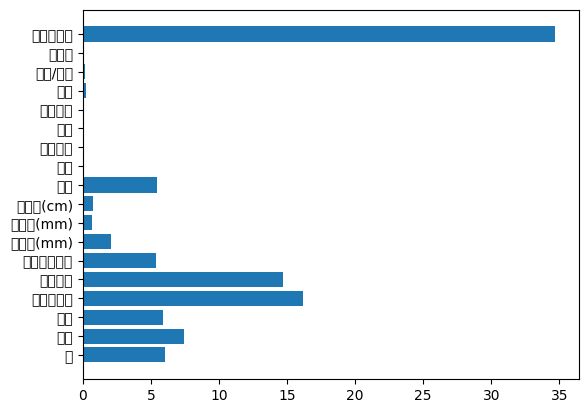

In [89]:
plt.barh(X_train.columns, model.feature_importances_)

test 데이터 최종 예측

자료형 변환(float >> int)

In [90]:
cols = ['소관지역', '풍향', '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림']
test[cols] = test[cols].astype('int64')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17289 entries, 0 to 17288
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        17289 non-null  int64  
 1   요일       17289 non-null  int64  
 2   시간       17289 non-null  int64  
 3   소관경찰서    17289 non-null  int64  
 4   소관지역     17289 non-null  int64  
 5   사건발생거리   17289 non-null  float64
 6   강수량(mm)  17289 non-null  float64
 7   강설량(mm)  17289 non-null  float64
 8   적설량(cm)  17289 non-null  float64
 9   풍향       17289 non-null  int64  
 10  안개       17289 non-null  int64  
 11  짙은안개     17289 non-null  int64  
 12  번개       17289 non-null  int64  
 13  진눈깨비     17289 non-null  int64  
 14  서리       17289 non-null  int64  
 15  연기/연무    17289 non-null  int64  
 16  눈날림      17289 non-null  int64  
 17  범죄발생지    17289 non-null  int64  
dtypes: float64(4), int64(14)
memory usage: 2.4 MB


test 예측

https://www.kaggle.com/general/196763

In [99]:
y_pred = model.predict(test)

CatBoostError: ignored